<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/loading_and_preprocessing_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 10th October, 2022
# Ref: https://www.tensorflow.org/tutorials/load_data/images
# This tutorial shows how to load and preprocess an image dataset in a simple way

## Call libraries

In [6]:
# 1.0
import tensorflow as tf
import numpy as np

# 1.0.1 
import PIL   # To directly display jpg file

# 1.0.2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow # To display jpg file
                                     # after conversion to numpy array

# 1.0.3 For manipulating directories
import pathlib

# 1.0.4 Deeplearning library:

from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential

In [7]:
# 1.1 Display multiple outputs from a cell:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Download data
Using keras.utils.get_file()<br>
See [here](https://www.tensorflow.org/api_docs/python/tf/keras/utils)

In [3]:
# 2.0 Data URL

data_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [8]:
# 2.1 Download file from URL. By default, it gets downloaded
#      to ~/.keras/ OR /root/.keras/datasets/flower_photos
# Ref: https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file

data_dir = tf.keras.utils.get_file( fname = "flower_photos",
                                    origin = data_url,
                                    untar = True,
                                  )


# 2.1.1
data_dir

228827136/228813984 [==============================] - 1s 0us/step


'/root/.keras/datasets/flower_photos'

## Examine data

In [9]:
# 2.2 Convert data_dir using pathlib:
#     data_dir is now of Path type

data_dir = pathlib.Path(data_dir)

In [10]:
# 2.2.1
# What are contents of data_dir?
# Use .iterdir() method of Path class:

[i for i in data_dir.iterdir() ]

[PosixPath('/root/.keras/datasets/flower_photos/LICENSE.txt'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion'),
 PosixPath('/root/.keras/datasets/flower_photos/roses'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers')]

In [11]:
# 2.2.2 List all directories under data_dir:
#       Also use is_dir method of pathlib:

dir_list = [ i for i in data_dir.iterdir() if i.is_dir()]
dir_list

[PosixPath('/root/.keras/datasets/flower_photos/dandelion'),
 PosixPath('/root/.keras/datasets/flower_photos/roses'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers')]

In [ ]:
# 2.2.3 Look within a folder:

for i in dir_list[0].glob("*"):
  print(i)


In [23]:
# 2.2.4 Get one flower each from each folder"

for i in dir_list:
  for j in i.glob("*"):
    print(j)
    break


/root/.keras/datasets/flower_photos/dandelion/4632251871_9f324a7bb5.jpg
/root/.keras/datasets/flower_photos/roses/8742493689_fb852f0228_n.jpg
/root/.keras/datasets/flower_photos/daisy/16025261368_911703a536_n.jpg
/root/.keras/datasets/flower_photos/tulips/8605564823_7a59d3d92a.jpg
/root/.keras/datasets/flower_photos/sunflowers/4977385375_e271e282f9.jpg


In [44]:
# 2.2.5 Transform jpg to numpy array:

im = PIL.Image.open("/root/.keras/datasets/flower_photos/dandelion/4632251871_9f324a7bb5.jpg")
np.asarray(im).shape

(332, 500, 3)

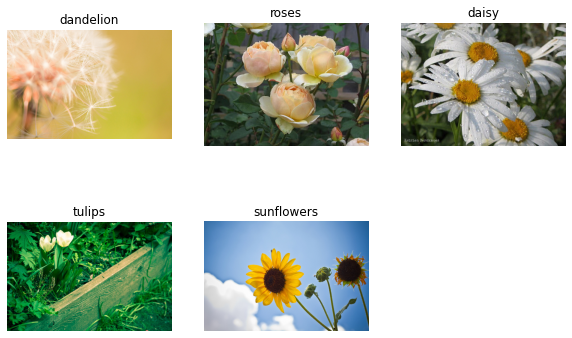

In [49]:
# 2.2.6 Plot one flower each from each folder:

class_names = ['dandelion', 'roses', 'daisy', 'tulips', 'sunflowers']
_=plt.figure(figsize = (10,10)) ;
for k,i in enumerate(dir_list):
  for j in i.glob("*"):
    ax = plt.subplot(3,3,k+1);
    im = PIL.Image.open(j) ;
    im = np.asarray(im) ;
    _=ax.imshow(im) ;
    _=plt.title(class_names[k]);
    _=ax.axis("off")
    break

## train/test data generators

In [51]:
# 3.0 Some constants:

batch_size = 32
image_size = (100,100)   # This is existing image size. How do I know? See below


#### tf.keras.utils.image_dataset_from_directory

See [here](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory)<br>
syntax<br>
>tf.keras.utils.image_dataset_from_directory(<br>
    directory,<br>
    labels='inferred',<br>
    label_mode='int',<br>
    class_names=None,<br>
    color_mode='rgb',<br>
    batch_size=32,<br>
    image_size=(256, 256),<br>
    shuffle=True,<br>
    seed=None,<br>
    validation_split=None,<br>
    subset=None,<br>
    interpolation='bilinear',<br>
    follow_links=False,<br>
    crop_to_aspect_ratio=False,<br>
    **kwargs<br>
)


In [52]:
# 4.0 Create tf.data.Dataset
# 4.0.1 training data generator:

train_ds = image_dataset_from_directory(data_dir,
                                        batch_size = batch_size,
                                        image_size = image_size,
                                        subset = "training",
                                        seed = 345,
                                        validation_split = 0.2
                                        )


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [53]:
# 4.1 validation data generator:

valid_ds = image_dataset_from_directory(data_dir,
                                        batch_size = batch_size,
                                        image_size = image_size,
                                        subset = "validation",
                                        seed = 456,
                                        validation_split = 0.2)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


### Test if we have data generators

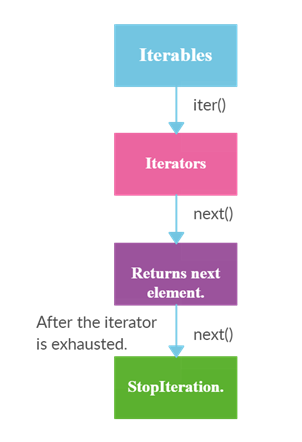

An iterator is also an iterable. It also has an \_\_iter__() method. But this method returns iterator itself. That is \_\_iter__() is an identity function. Thus, we can use iterator wherever we can use iterable. <br>
Generator is a function which returns a generator iterator. It looks like a normal function except that it contains yield expressions for producing a series of values usable in a for-loop or that can be retrieved one at a time with the next() function. <br>

In [ ]:
# 4.2 valid_ds and train_ds are data generators:
#     Test them as follows:

next(iter(valid_ds))

In [ ]:
# 4.2.1 Or as follows:

valid_ds.__iter__().__next__()

In [ ]:
# 4.3 Get all batches from train_ds
for image_batches, label_batches in train_ds:
  print(image_batches.shape)
  print(label_batches.shape)

In [66]:
# 4.4 Get one batch from train_ds:
for image_batches, label_batches in train_ds:
  ib = image_batches
  lb = label_batches
  break;

# 4.4.1 Check shape
ib.shape
print("\n====")
lb.shape  

TensorShape([32, 100, 100, 3])


====


TensorShape([32])

In [63]:
# 4.5 Get one batch from train_ds:

for image_batches, label_batches in train_ds.take(1):
  ib = image_batches
  lb = label_batches


# 4.5.1 Check batch shape:

ib.shape
print("\n==")
lb.shape 


TensorShape([32, 100, 100, 3])

TensorShape([32])

In [ ]:
# 4.6 Convert tensor to numpy array:

ib.numpy()

## Build model

In [ ]:
# 5.0 Build model:

model = Sequential(
                    [
                        tf.keras.layers.Input(shape = (100,100,3)),
                        tf.keras.layers.Rescaling(1.0/255.0),
                        tf.keras.layers.Resizing(height = 50, width = 50 ),
                        tf.keras.layers.Conv2D(32,(3,3), activation = 'relu' ),
                        tf.keras.layers.Conv2D(32,(3,3), activation = 'relu' ),
                        tf.keras.layers.Conv2D(32,(3,3), activation = 'relu' ),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(100, activation = 'relu'),
                        tf.keras.layers.Dense(10, activation = 'softmax')
                    ]

                  )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 resizing (Resizing)         (None, 50, 50, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 61952)             0         
                                                                 
 dense (Dense)               (None, 100)               6

In [ ]:
# 5.1 Compile model:

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

## Train model

In [ ]:
# 5.2 Train model:

history = model.fit(train_ds,
                    epochs = 50,
                    validation_data = valid_ds
                    )

In [ ]:
######################### Done ####################3